# Dataset

Hourly timeseries of electricity consumption and production (with production type) in Romania.

It includes the hourly consumption and production, and the production is split in one of the categories: Nuclear, Wind, Hydroelectric, Oil and Gas, Coal, Solar, Biomass.

Romania has a broad spectrum of electricity productions, including quite a lot of solar and wind, but also nuclear!

When the production is greater than the consumption it means we are exporting electricity, when the value is smaller it means we are importing electricity.

All values are in MWs.

## EDA

In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.ion()

sns.set(style="darkgrid")
%matplotlib inline

### leer datos:

In [2]:
data = pd.read_csv("..\..\data\electricityConsumptionAndProductioction.csv")

# Transformar a datetime
data["DateTime"] = pd.to_datetime(data["DateTime"])
data.set_index("DateTime", inplace=True)

In [3]:
data.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [4]:
# verificamos si hay datos faltantes
data.isnull().sum()


Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64

In [5]:
data.shape

(46011, 9)

In [6]:
"El rango analizado va desde "+ str(data.index.min()) +" hasta "+ str(data.index.max())

'El rango analizado va desde 2019-01-01 00:00:00 hasta 2024-03-31 23:00:00'

Se tiene información horaria de más de 5 años, entre 2019 y 2024. NO hay valores nulos, lo representa un total de 46011 filas y 9 columnas.

### Gráficos

Inicialmente se visualizar la información horaria de producción y consumo:

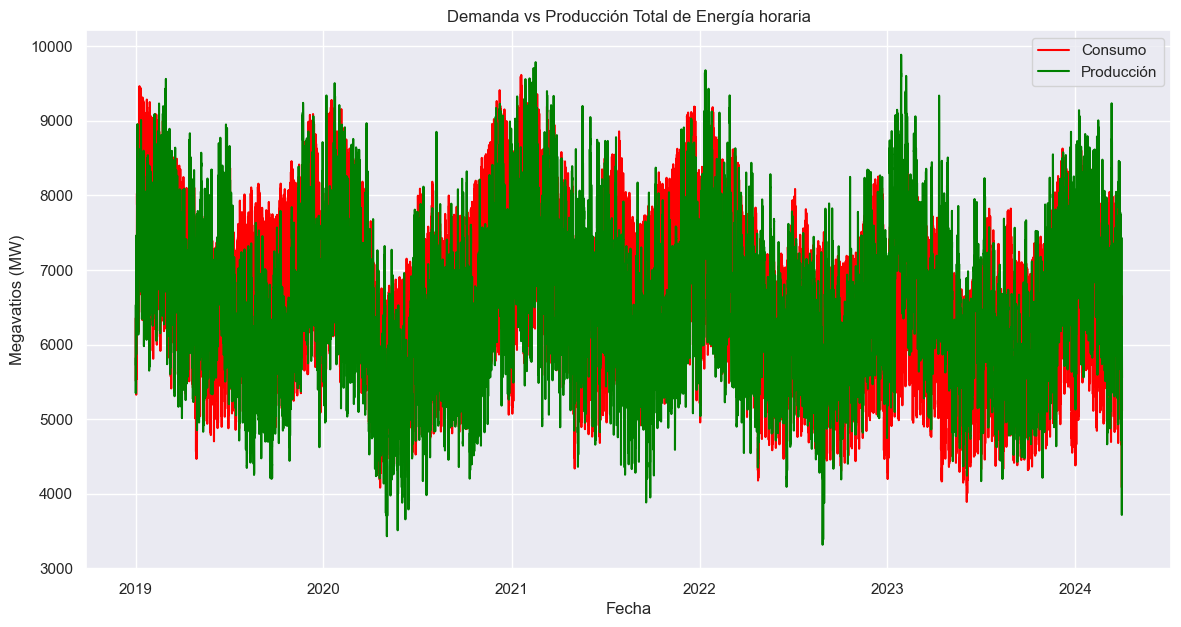

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Consumption'], label='Consumo', color='red')
plt.plot(data.index, data['Production'], label='Producción', color='green')
plt.title('Demanda vs Producción Total de Energía horaria')
plt.xlabel('Fecha')
plt.ylabel('Megavatios (MW)')
plt.legend()
plt.show()

No obstante, esa información gráficamente es confusa no permite apreciar tendencias claras, por lo que procedemos a agregarla (para visualizar mejor)

In [8]:
# Agregar datos a intervalos diarios
data_dia = data.resample('D').sum()

# Visualizar los primeros días
data_dia.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01,142984,142186,33402,8246,30861,34032,33809,1039,787
2019-01-02,151729,163097,33380,26562,30065,38764,32175,1280,858
2019-01-03,174098,172854,32929,23743,35453,43732,35225,800,956
2019-01-04,183242,191724,32914,44510,33884,41808,36469,1092,1038
2019-01-05,177114,164069,33440,15108,29089,44158,39031,2226,1008


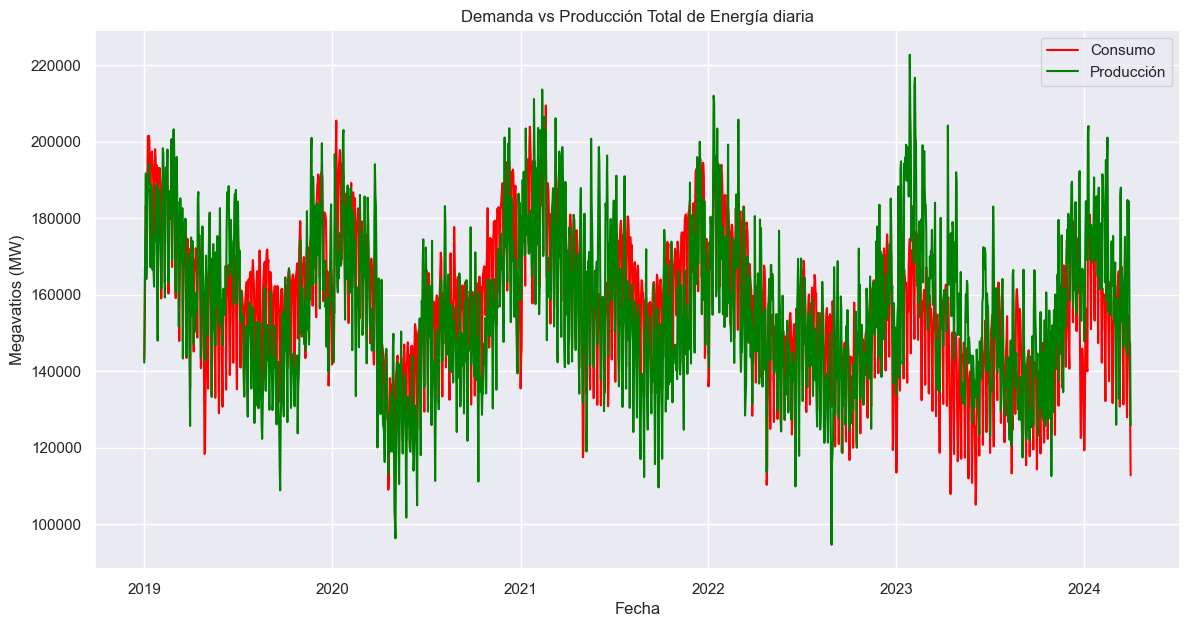

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(data_dia.index, data_dia['Consumption'], label='Consumo', color='red')
plt.plot(data_dia.index, data_dia['Production'], label='Producción', color='green')
plt.title('Demanda vs Producción Total de Energía diaria')
plt.xlabel('Fecha')
plt.ylabel('Megavatios (MW)')
plt.legend()
plt.show()

La información diaria tampoco permite visualizar mayor detalle, por tanto, 

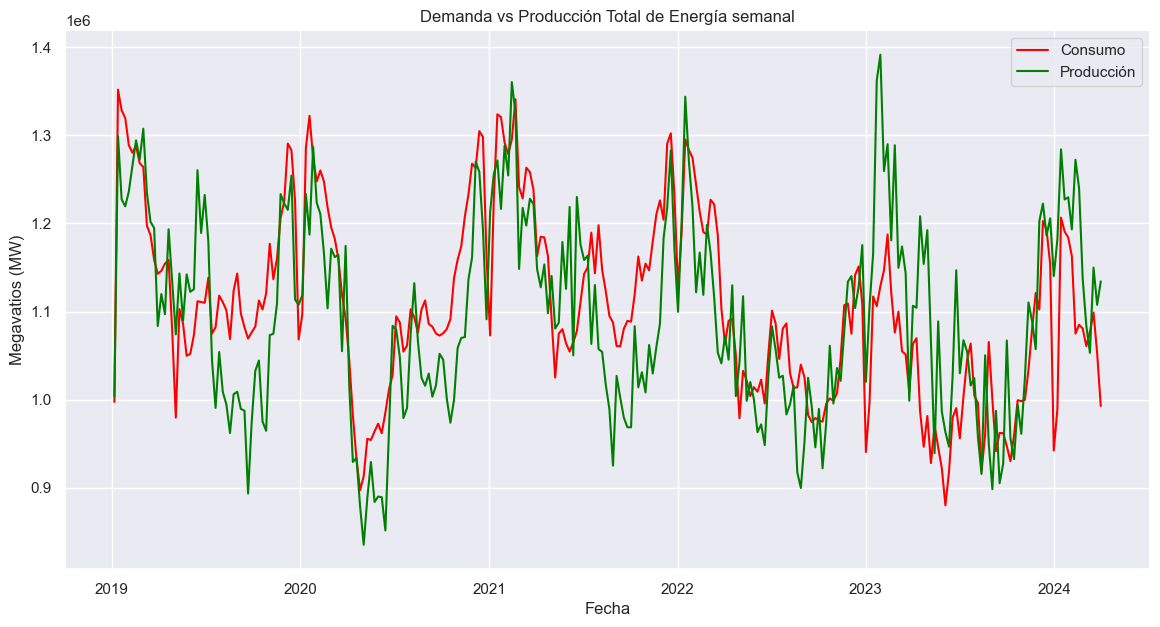

In [10]:
# Agregar datos a intervalos diarios
data_semana = data.resample('W').sum()

plt.figure(figsize=(14, 7))
plt.plot(data_semana.index, data_semana['Consumption'], label='Consumo', color='red')
plt.plot(data_semana.index, data_semana['Production'], label='Producción', color='green')
plt.title('Demanda vs Producción Total de Energía semanal')
plt.xlabel('Fecha')
plt.ylabel('Megavatios (MW)')
plt.legend()
plt.show()

Aquí podemos apreciar que al parecer, luego de la mitad del año, se generar menos energía en Rumanía, por lo tanto, son épocas dónde es necesario importar energía.

<Figure size 1400x700 with 0 Axes>

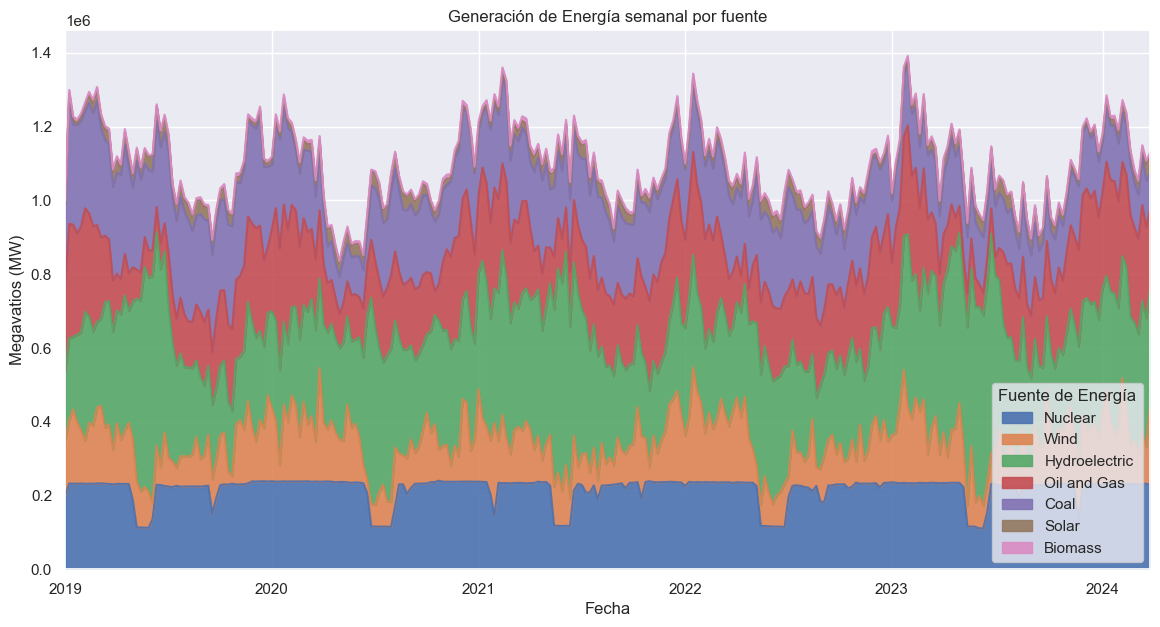

In [11]:
# Seleccionar las columnas de generación por fuente
fuentes = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Graficar
plt.figure(figsize=(14, 7))
data_semana[fuentes].plot(kind='area', stacked=True, figsize=(14,7), alpha=0.9)
plt.title('Generación de Energía semanal por fuente')
plt.xlabel('Fecha')
plt.ylabel('Megavatios (MW)')
plt.legend(title='Fuente de Energía')
plt.show();


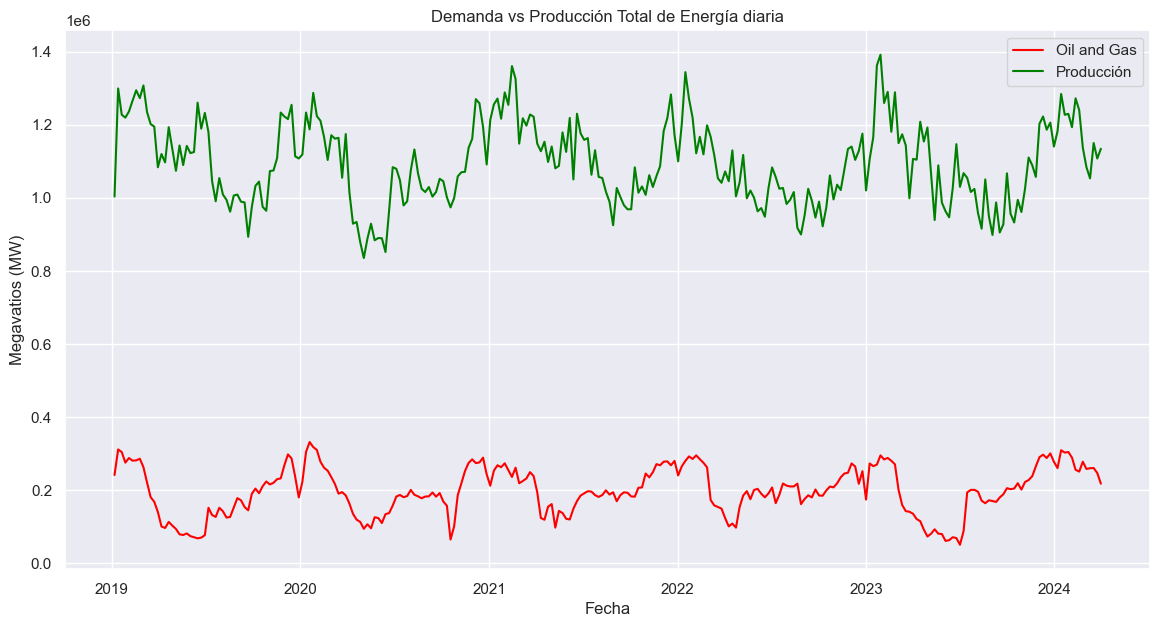

In [12]:
# Agregar datos a intervalos diarios
data_semana = data.resample('W').sum()

plt.figure(figsize=(14, 7))
plt.plot(data_semana.index, data_semana['Oil and Gas'], label='Oil and Gas', color='red')
plt.plot(data_semana.index, data_semana['Production'], label='Producción', color='green')
plt.title('Demanda vs Producción Total de Energía diaria')
plt.xlabel('Fecha')
plt.ylabel('Megavatios (MW)')
plt.legend()
plt.show()

De la última gráfica, es interesante ver como la energía producia por _oil and gas_ tiende a subir en los fines e inicios de año, y cae en la mitad de cada año.